In [16]:
%run C:\Users\GabrielFreitas\Desktop\Python\BerryGarden\blossom

In [8]:
CVI, CE = cb.readCVI(path=r'C:\Users\GabrielFreitas\Desktop\PhD\Data\Raw\Zeppelin\CVI'+'\\',
                     startdate='2020-05-31',
                     enddate='2020-06-01',
                     )

2it [00:02,  1.36s/it]


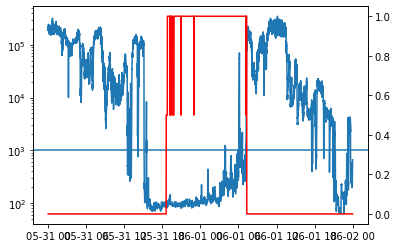

In [9]:
plt.plot(CVI.visiblty)
plt.yscale('log')
plt.axhline(y=1e3)
plt.twinx()
plt.plot(CVI.cloud,color='red')

In [2]:
CVI, CE = cb.readCVI(path=r'C:\Users\GabrielFreitas\Desktop\PhD\Data\Raw\Zeppelin\CVI'+'\\',
                     startdate='2020-06-01')

1it [00:01,  1.35s/it]


In [ ]:
DMPS_Cloud = DMPS[(DMPS.index > CE.loc[5].S)&(DMPS.index < CE.loc[5].E)]